In [1]:
import numpy as np
from specpol import plot_ritz
from specpol.findiff import sturm_liouville

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

def plot(ritz_results, title=None):
    # plot the approximation with some added bars and lines

    fig, ax1, ax2 = plot_ritz(ritz_results)
    fig.suptitle(title, fontsize=12)

    ax1.set_ylim(-0.5, 2.5)

    ax1.axhline(-0.2277, linestyle="--", alpha=0.6, color='#ad5151')

    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.25)

    ax2.axvline(-0.2277, linestyle="--", alpha=0.6, color='#ad5151')

    ax2.axvline(0.335936534279424, linestyle="--", alpha=0.6)
    ax2.axvline(0.536620364148446, linestyle="--", alpha=0.6)
    ax2.axvline(0.580834838005921, linestyle="--", alpha=0.6)
    ax2.axvline(0.591500609480355, linestyle="--", alpha=0.6)

    ax2.axvline(0.949634991713441, linestyle="--", alpha=0.6)
    ax2.axvline(1.24466406161563, linestyle="--", alpha=0.6)
    ax2.axvline(1.29192807845892, linestyle="--", alpha=0.6)

    ax2.axvspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax2.axvspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax2.axvspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    plt.show()


def plot_eig(specs, eigfunc):
    # plot the approximation with some added bars and lines

    viridis = colormaps["viridis"].resampled(len(specs))

    fig = plt.figure(figsize=(13, 5))

    ax1 = fig.add_subplot(1, 2, 1, adjustable="box")
    ax1.set_prop_cycle(color=viridis.colors)

    for i in specs:
        ax1.scatter([i] * len(specs[i]), specs[i].real, s=8)

    ax1.set_xlabel("size of Ritz matrix (number of rows/columns)")
    ax1.set_ylabel("real part of eigenvalues of the Ritz matrix")
    ax1.set_title(r"Finite difference approximation of Sturm-Liouville operator")

    ax1.set_ylim(-0.5, 2.5)

    ax1.axhline(-0.2277, linestyle="--", alpha=0.6, color='#ad5151')

    ax1.axhline(0.335936534279424, linestyle="--", alpha=0.6)
    ax1.axhline(0.536620364148446, linestyle="--", alpha=0.6)
    ax1.axhline(0.580834838005921, linestyle="--", alpha=0.6)
    ax1.axhline(0.591500609480355, linestyle="--", alpha=0.6)

    ax1.axhline(0.949634991713441, linestyle="--", alpha=0.6)
    ax1.axhline(1.24466406161563, linestyle="--", alpha=0.6)
    ax1.axhline(1.29192807845892, linestyle="--", alpha=0.6)

    ax1.axhspan(-0.3784, -0.34766, facecolor="green", alpha=0.2)
    ax1.axhspan(0.594799, 0.9180581788, facecolor="green", alpha=0.2)
    ax1.axhspan(1.2931662851, 2.2851569481, facecolor="green", alpha=0.2)

    ax2 = fig.add_subplot(1, 2, 2, adjustable="box")
    ax2.plot(eigfunc, color='#ad5151')
    ax2.set_title("Eigenfunction corresponding to eigenvalue at -0.2277...")
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"value of eigenfunction $\varphi(x)$")

In [15]:
def potential(x):
    return np.sin(x) - 40 / (1 + x**2)
def barrier(x):
    return 1j * (x <= 150)

In [16]:
sl_spec = {}
sl_spec_dbm = {}
for i in range(50, 775, 25):
    sl_spec[i] = sturm_liouville(potential, 2 * np.pi / 40, np.pi / 8, i)

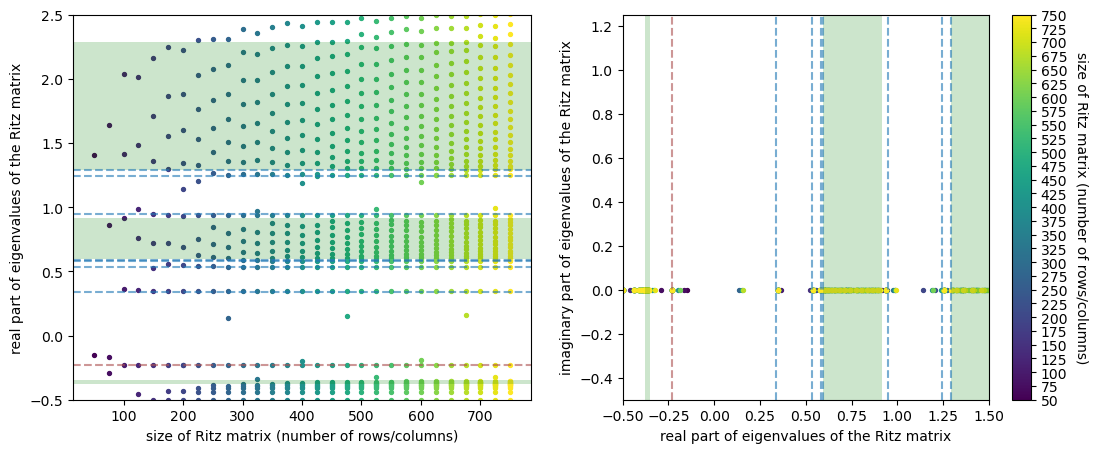

In [17]:
plot(sl_spec)

In [6]:
pairs = sturm_liouville(potential, 2 * np.pi / 40, np.pi / 8, 400, vectors=True)

In [7]:
eig = pairs.filter(lambda x: x.real > -0.25 and x.real < 0.00)
val, vec = list(eig.data.items())[0]

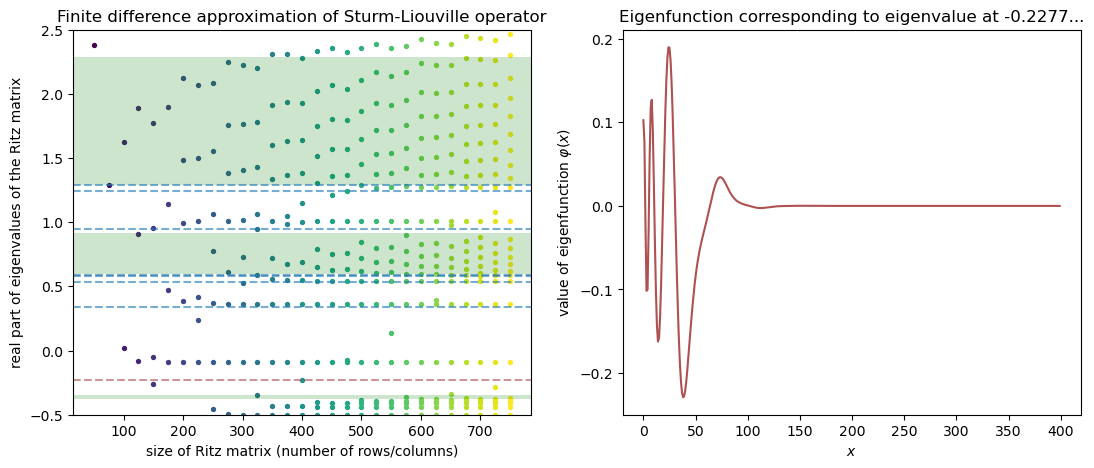

In [8]:
plot_eig(sl_spec, vec)

In [9]:
lu = -np.diff(vec, n=2, prepend=0, append=0) + np.array([potential(x) for x in np.linspace(0, len(vec), 1)])*vec

np.linalg.norm(lu - val*vec)

39.679526038064395

40.3237282452457

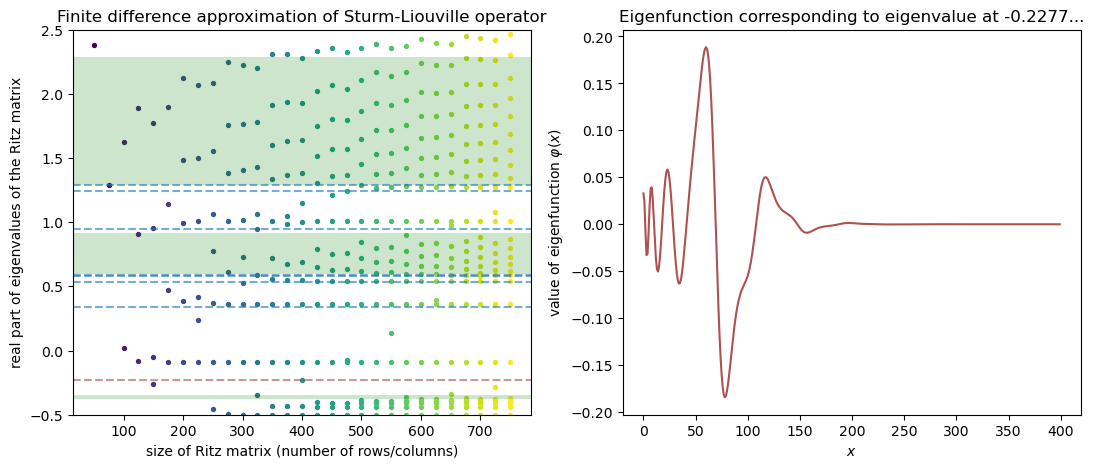

In [18]:
safe_eig = pairs.filter(lambda x: x.real < 0.5 and x.real > 0.00)
val, vec = list(safe_eig.data.items())[0]
plot_eig(sl_spec, vec)
lu = (-np.diff(vec, n=2, prepend=0, append=0) + np.array([potential(x) for x in np.linspace(0, len(vec), 1)])*vec)
np.linalg.norm(lu - val*vec)

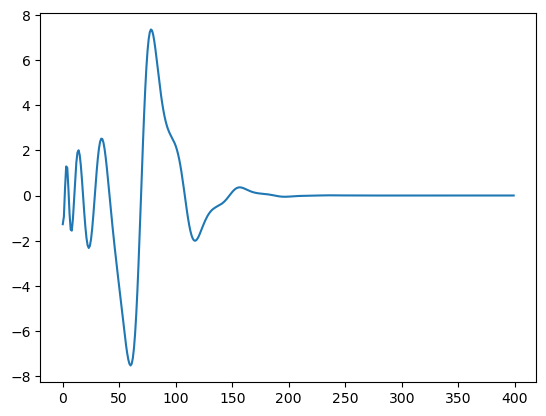

In [21]:
plt.plot(lu)